# CS4243 Lab 1: Template Matching

- The functions to be implemented are given in `lab1.py`, along with the instructions for each function. You need to fill in the codes which start with `###Your code here###` and end with `###`
- The test images are given in folder "inputs".
- Most of these functions are available in build-in libraries, but you are not allowed to use them in this assignment, only numpy is allowed except `numpy.pad()`.
- Apart from the pdf instructions, we provide a detailed instruction for each function in `lab1.py`. Please check these instructions if you find it difficult to implement the codes.

**Attention:**
- Please be careful about the data type of the image!
- Please use python with version >= 3.5.4, and install the libs provided in requirements.txt via `pip install -r requirements.txt`.
- Please do not change the structure of files in the whole folder of this assignment, otherwise TA may mark your code wrongly.
- Please do not change the input arguments of the functions in `lab1.py`, otherwise your implementation would fail to pass the test.
- Except for the input parameters of `non_maximum_suppression`, please do not change other codes in this notebook

1. **Image preprossessing** 15% (rgb2gray, gray2grad, pad_zeros)
2. **Normalized Cross Correlation** 30% (normalized_cross_correlation, normalized_cross_correlation_fast, normalized_cross_correlation_matrix)
3. **Non-maximum Suppression** 10% (non_max_supression) 
4. **Template Matching** 45% (normalized_cross_correlation_ms, 5 short answer questions)

## Part 1 Image preprossessing (15%)
+ rgb2gray: 5 points
+ gray2grad: 5 points
+ pad_zeros: 5 points

Relative error of gray2grad() (<1e-8 will be fine): 0.0


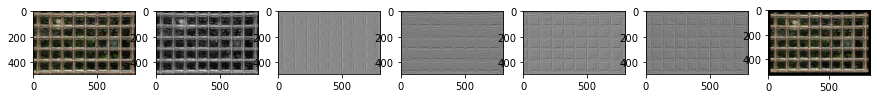

In [242]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import importlib
import lab1
importlib.reload(lab1)

data_dir = 'inputs'
filename = 'wallpaper.jpg'
img = lab1.read_img(os.path.join(data_dir, filename))

# RGB image to grayscale image
img_gray = lab1.rgb2gray(img)
# Grayscale image to gradient image
img_grad_h, img_grad_v, img_grad_d1, img_grad_d2 = lab1.gray2grad(img_gray)

# Padding
img_pad = lab1.pad_zeros(img, 20, 20, 20, 20)
lab1.show_imgs([img, img_gray, img_grad_h, img_grad_v, img_grad_d1, img_grad_d2, img_pad])

# For evaluation purpose
sobelh = np.array([[-1, 0, 1], 
                   [-2, 0, 2], 
                   [-1, 0, 1]], dtype = float)
img_grad_h_cv2 = cv2.filter2D(img_gray.astype(float), -1, cv2.flip(sobelh, -1), borderType=cv2.BORDER_CONSTANT)
print('Relative error of gray2grad() (<1e-8 will be fine):', np.linalg.norm(img_grad_h - img_grad_h_cv2))

## Part 2 Normalized Cross-Correlation (30%)

+ normalized_cross_correlation: 10 points
+ normalized_cross_correlation_fast: 10 points
+ normalized_cross_correlation_matrix: 10 points

(243, 1)
(17024, 243, 1)
(17024, 27) (17024, 27, 1) (17024, 27, 1)
Runtime of normalized_cross_correlation(): 0.000000s
Runtime of normalized_cross_correlation_fast(): 0.000000s
Runtime of normalized_cross_correlation_matrix(): 0.125961s


AttributeError: 'list' object has no attribute 'shape'

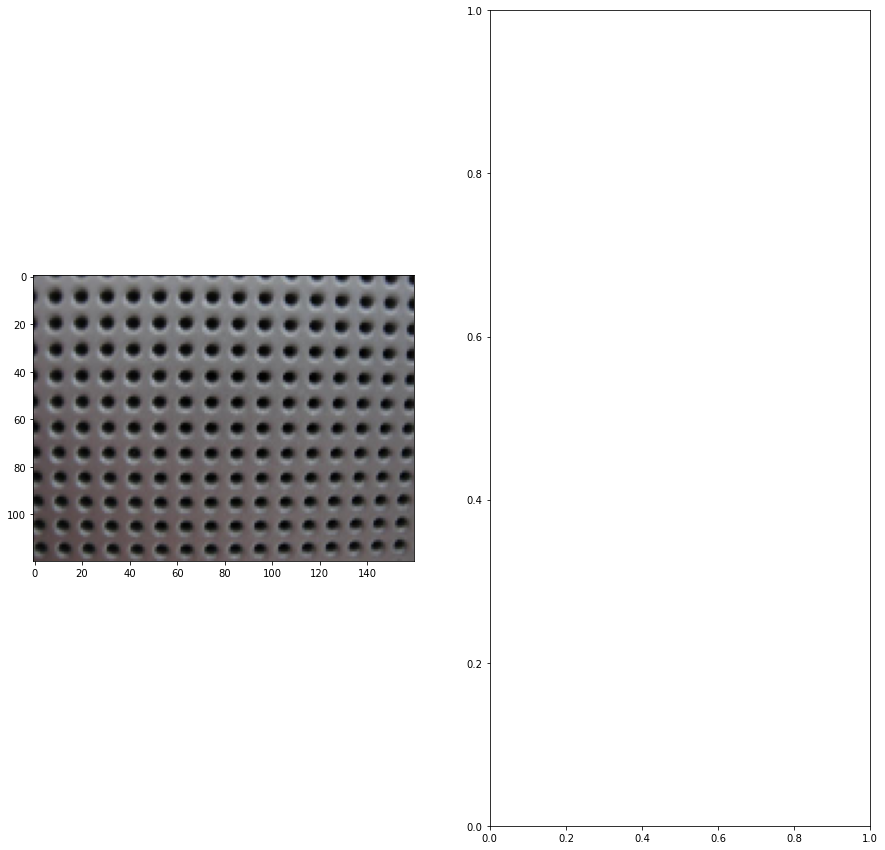

In [252]:
import os
import matplotlib.pyplot as plt
%matplotlib inline
import importlib
import numpy as np
import time
import cv2
import lab1
importlib.reload(lab1)

data_dir = 'inputs'
filename = 'holes.jpg'
img = lab1.read_img(os.path.join(data_dir, filename))
img = cv2.resize(img, (0, 0), fx=0.25, fy=0.25) # downsample the input image to save computation cost
template = img[5:14, 5:14]

t1 = time.time()
# response = lab1.normalized_cross_correlation(img, template)
t2 = time.time()
# response_fast = lab1.normalized_cross_correlation_fast(img, template)
t3 = time.time()
response_matrix = lab1.normalized_cross_correlation_matrix(img, template)
t4 = time.time()

print('Runtime of normalized_cross_correlation(): %fs'%(t2-t1))
print('Runtime of normalized_cross_correlation_fast(): %fs'%(t3-t2))
print('Runtime of normalized_cross_correlation_matrix(): %fs'%(t4-t3))

lab1.show_imgs([img, response_matrix])
# lab1.show_imgs([img, template, response, response_fast])
# For evaluation purpose
response_cv2 = cv2.matchTemplate(img, template, cv2.TM_CCORR_NORMED)
# print('Relative error of normalized_cross_correlation() (<1e-4 will be fine):', np.linalg.norm(response - response_cv2))
# print('Relative error of normalized_cross_correlation_fast() (<1e-4 will be fine):', np.linalg.norm(response_fast - response_cv2))
# print('Relative error of normalized_cross_correlation_matrix() (<1e-4 will be fine):', np.linalg.norm(response_matrix - response_cv2))

## Part 3 Non-maximum Suppression (10%)

+ non_max_suppression: 10 points

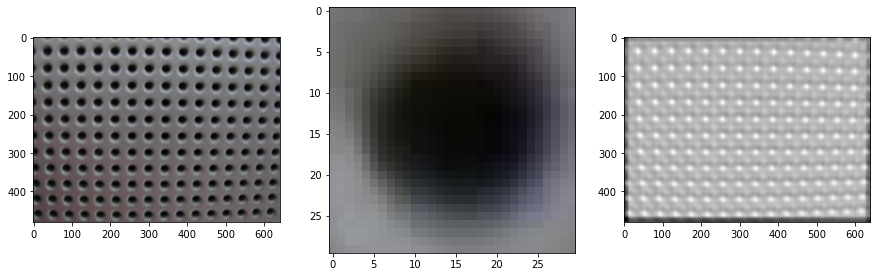

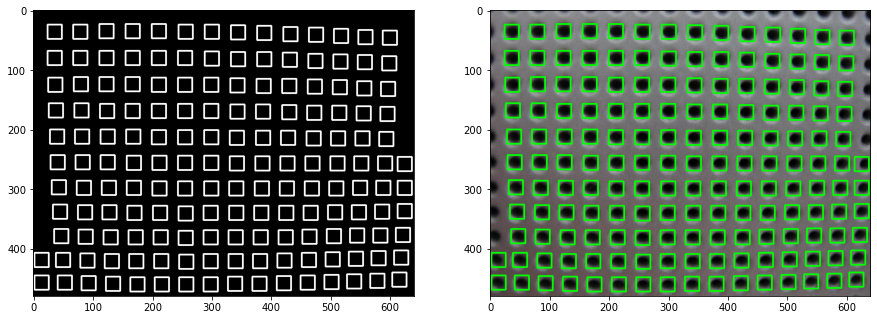

In [223]:
import os
import matplotlib.pyplot as plt
%matplotlib inline
import importlib
import lab1
importlib.reload(lab1)

data_dir = 'inputs'
filename = 'holes.jpg'
img = lab1.read_img(os.path.join(data_dir, filename))
template = img[22:52, 22:52]

# pad zeros to the image
pad_height_bef, pad_height_aft = template.shape[0] // 2 - (1 if template.shape[0] % 2 == 0 else 0), template.shape[0] // 2
pad_width_bef, pad_width_aft = template.shape[1] // 2 - (1 if template.shape[1] % 2 == 0 else 0), template.shape[1] // 2
img_pad = lab1.pad_zeros(img, pad_height_bef, pad_height_aft, pad_width_bef, pad_width_aft)

# perform template matching
response = lab1.normalized_cross_correlation_fast(img_pad, template)
lab1.show_imgs([img, template, response])

res = lab1.non_max_suppression(response, (int(template.shape[0] * 0.8), int(template.shape[1] * 0.8)), threshold=0.9)
lab1.show_img_with_squares(res, img_ori=img)

## Part 4 Study on Template Matching (45%)

### 4.1 Image Inputs (5%)
No question in this part. You will get full marks if you achieve similar results.

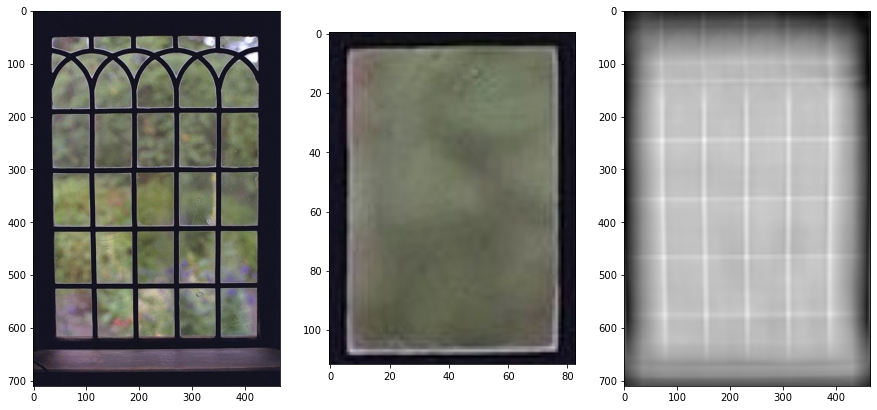

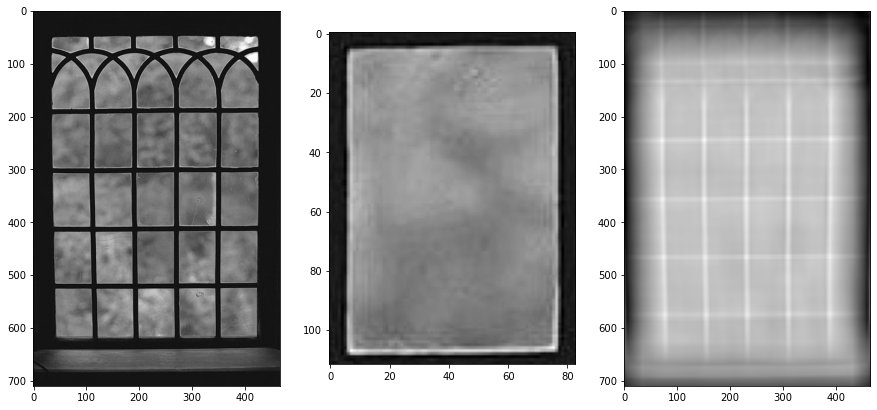

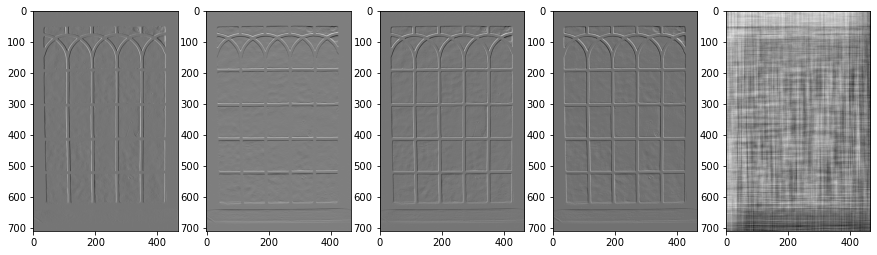

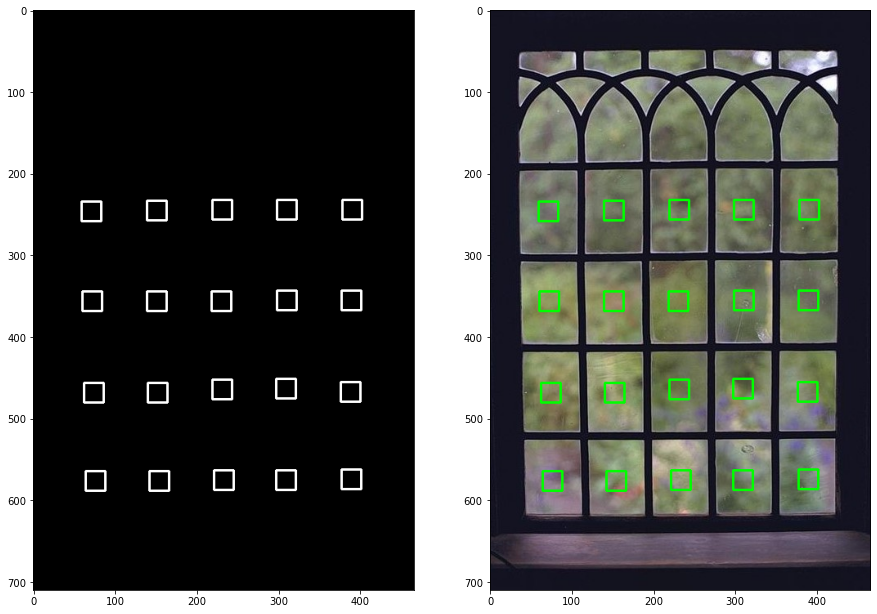

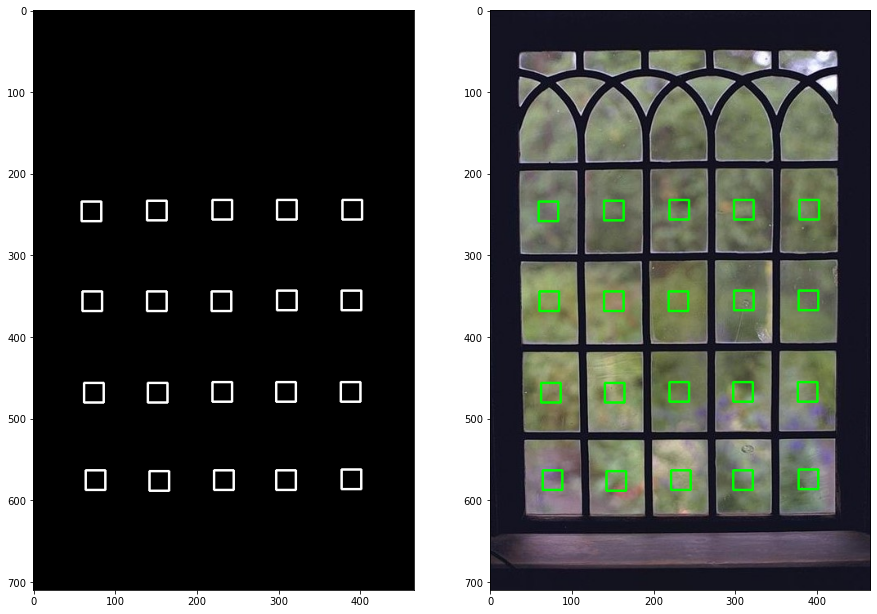

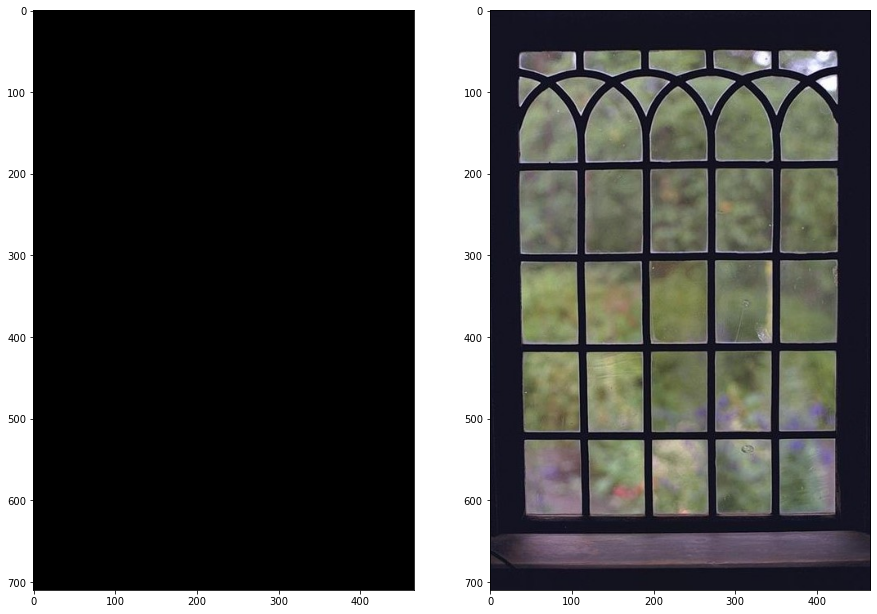

In [227]:
import os
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import lab1
importlib.reload(lab1)

data_dir = 'inputs'
filename = 'window.jpg'
img = lab1.read_img(os.path.join(data_dir, filename))
template = img[190:302, 110:193]

# RGB to grayscale
img_gray = lab1.rgb2gray(img)
template_gray = lab1.rgb2gray(template)

# RGB to grayscale
img_gray = lab1.rgb2gray(img)
template_gray = img_gray[190:302, 110:193]

# RGB to gradient map
img_grad_h, img_grad_v, img_grad_d1, img_grad_d2 = lab1.gray2grad(img_gray)
img_grad = np.stack([img_grad_h, img_grad_v, img_grad_d1, img_grad_d2], -1)
template_grad = img_grad[190:302, 110:193]

# pad zeros to the image
pad_height_bef, pad_height_aft = template.shape[0] // 2 - (1 if template.shape[0] % 2 == 0 else 0), template.shape[0] // 2
pad_width_bef, pad_width_aft = template.shape[1] // 2 - (1 if template.shape[1] % 2 == 0 else 0), template.shape[1] // 2
img_pad = lab1.pad_zeros(img, pad_height_bef, pad_height_aft, pad_width_bef, pad_width_aft)
img_gray_pad = lab1.pad_zeros(img_gray, pad_height_bef, pad_height_aft, pad_width_bef, pad_width_aft)
img_grad_pad = lab1.pad_zeros(img_grad, pad_height_bef, pad_height_aft, pad_width_bef, pad_width_aft)


# perform match template
response = lab1.normalized_cross_correlation_fast(img_pad, template)
response_gray = lab1.normalized_cross_correlation_fast(img_gray_pad, template_gray)
response_grad = lab1.normalized_cross_correlation_fast(img_grad_pad, template_grad)



lab1.show_imgs([img, template, response])
lab1.show_imgs([img_gray, template_gray, response_gray])
lab1.show_imgs([img_grad[:,:,0], img_grad[:,:,1], img_grad[:,:,2], img_grad[:,:,3], response_grad])

# !!! Adjust the suppress range or threshold if you fail to detect 4x5 repetitive patterns in the image for RGB and grayscale inputs
res = lab1.non_max_suppression(response, (int(template.shape[0] * 0.8), int(template.shape[1] * 0.8)), threshold=0.9)
lab1.show_img_with_squares(res, img_ori=img)

res_gray = lab1.non_max_suppression(response_gray, (int(template.shape[0] * 0.8), int(template.shape[1] * 0.8)), threshold=0.9)
lab1.show_img_with_squares(res_gray, img_ori=img)

res_grad = lab1.non_max_suppression(response_grad, (int(template.shape[0] * 0.8), int(template.shape[1] * 0.8)), threshold=0.3)
lab1.show_img_with_squares(res_grad, img_ori=img)

### 4.2 Template Inputs (6%)

+ Q&A: 6 points

Q: Explain why their response positions are different.

A: Due to the difference in pixel values of the templates used for each of the three responses, the locations of local maximums will differ between the three responses as the result of the normalized cross-correlation will differ. 
From the cross correlation formula, we can observe that the response will differ in terms of |F|, as well as the element wise multiplication between the kernel and image regions, although the template size is the same. Thus, this will generate differing response matrices after the normalized cross correlation, which in turn will produce differing local maxima when undergoing non-maximum suppression.

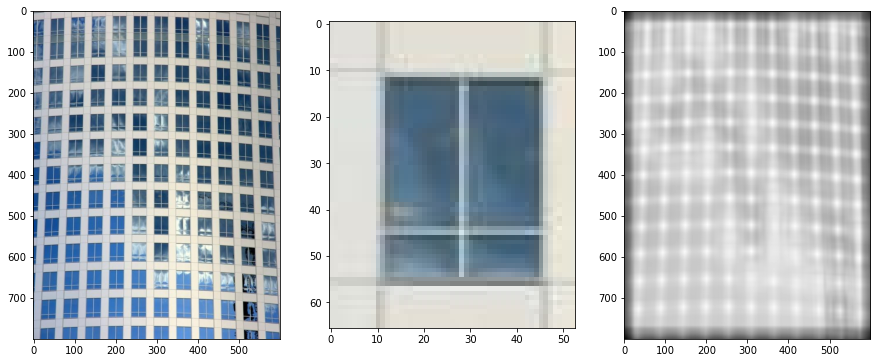

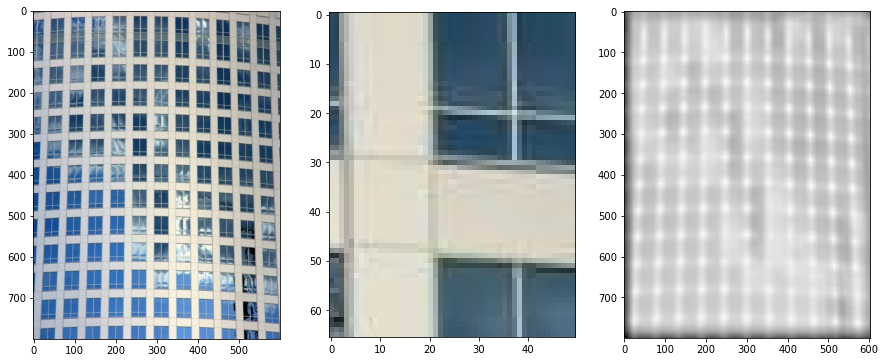

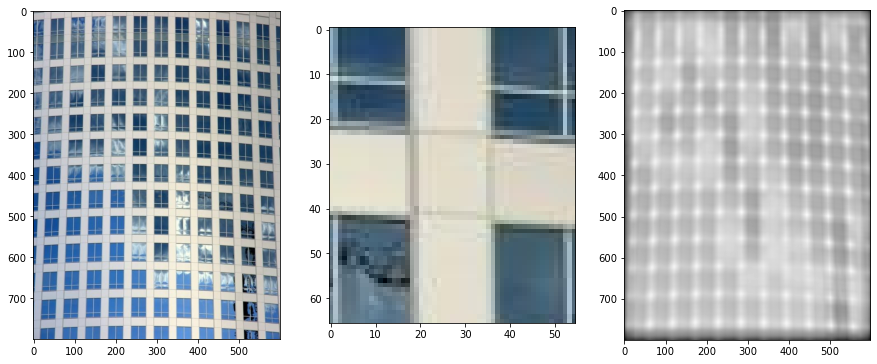

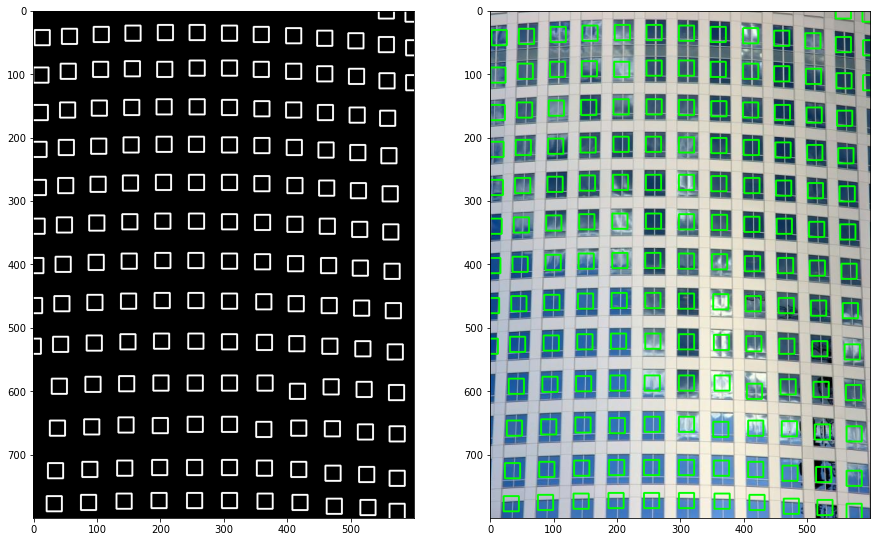

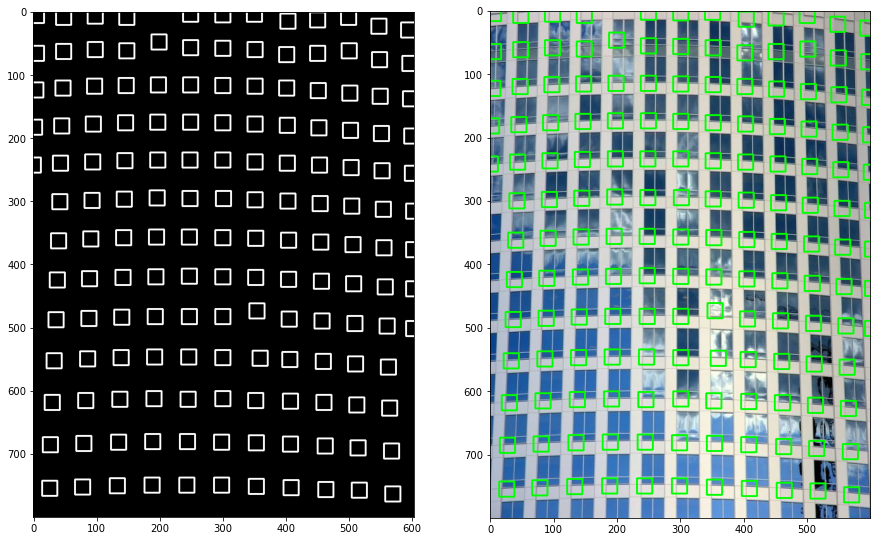

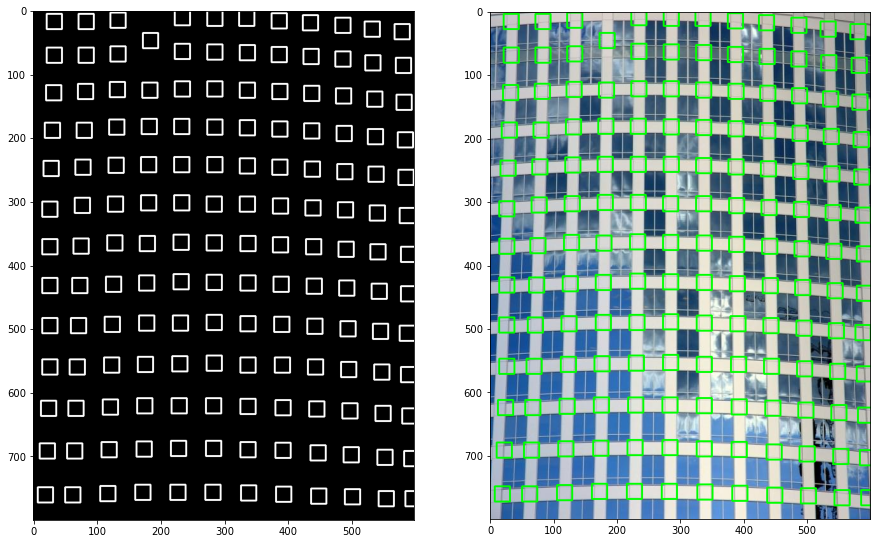

In [245]:
import os
import matplotlib.pyplot as plt
%matplotlib inline
import importlib
import lab1
importlib.reload(lab1)


data_dir = 'inputs'
filename = 'building.jpg'
img = lab1.read_img(os.path.join(data_dir, filename))
template = img[425:491, 230:283]
template2 = img[394:460, 430:480]
template3 = img[400:466, 415:470]

# pad zeros to the image
pad_height_bef, pad_height_aft = template.shape[0] // 2 - (1 if template.shape[0] % 2 == 0 else 0), template.shape[0] // 2
pad_width_bef, pad_width_aft = template.shape[1] // 2 - (1 if template.shape[1] % 2 == 0 else 0), template.shape[1] // 2
img_pad = lab1.pad_zeros(img, pad_height_bef, pad_height_aft, pad_width_bef, pad_width_aft)


# perform match template
response = lab1.normalized_cross_correlation_fast(img_pad, template)
response2 = lab1.normalized_cross_correlation_fast(img_pad, template2)
response3 = lab1.normalized_cross_correlation_fast(img_pad, template3)

lab1.show_imgs([img, template, response])
lab1.show_imgs([img, template2, response2])
lab1.show_imgs([img, template3, response3])

res = lab1.non_max_suppression(response, (int(template.shape[0] * 0.8), int(template.shape[1] * 0.8)), threshold=None)
lab1.show_img_with_squares(res, img_ori=img)

res2 = lab1.non_max_suppression(response2, (int(template.shape[0] * 0.8), int(template.shape[1] * 0.8)), threshold=None)
lab1.show_img_with_squares(res2, img_ori=img)

res3 = lab1.non_max_suppression(response3, (int(template.shape[0] * 0.8), int(template.shape[1] * 0.8)), threshold=None)
lab1.show_img_with_squares(res3, img_ori=img)

### 4.3 Template Size (6%）

+ Q&A: 6 points

Q1: How can each of these templates be used to detect every hole present in the input image?

A1: To detect template matches in the input image, the correlation between the input image region and the template is calculated, which produces local maxima at the region of greatest overlap between the input image pixels and the template pixels. 
Despite the templates having different sizes, by adjusting the padding amount based on the template size, we are still able to perform cross-correlation, which results in responses appearing at the edges and borders. Furthermore, due to the normalization factor |Wij| being smaller at the edges and corners due to the larger amount of padded zeroes, the reduced correlation response value at the edges and corners is somewhat mitigated, leading to a larger response value in the final output in those regions, creating a local maximum. This will allow the template to detect these responses as matches after non-maximum suppression.

Q2: Analyze and explain the subtle differences in the output borders.

A2: For a 1x1 hole template, the border remains more or less the same. For a 1x3 hole template, the border is more vertically rectangular in shape (the sides are not included), and for a 3x1 hole template, the border is more horizontally rectangular in shape (the top and bottom are not included). Lastly, the 3x3 hole template produces a output with shrunken borders.

This is likely due to the local maximum points not occurring at the edges depending on the template. For example, the 1x3 template would not produce a high correlation result at the sides of the image, as one or more of the holes would be missing to match with the template, which would instead be replaced with padded zeroes. This would reduce the magnitude of the correlation results, thus causing a lower correlation value to appear at the sides of the image leading to a darkened border. The same can be inferred for the 3x1 and 3x3 templates, with their respective borders and "missing" image pixels to match with the template.

Q3: Describe the correlation output with templates with a 1x1.5 or a 1x2 array of holes.

A3: I would expect the correlation output for a template with 1x1.5 or 1x2 array of holes to lie somewhere in between the 1x1 and 1x3 template output borders, with similar darkened areas at the sides of the output, althought it would be less thick than the 1x3 template. The same logic applies here, where either half or one hole would be missing and instead padded with zeroes, leading to a smaller magnitude in the correlation result, thus outputting a lower response value and hence a darker area.

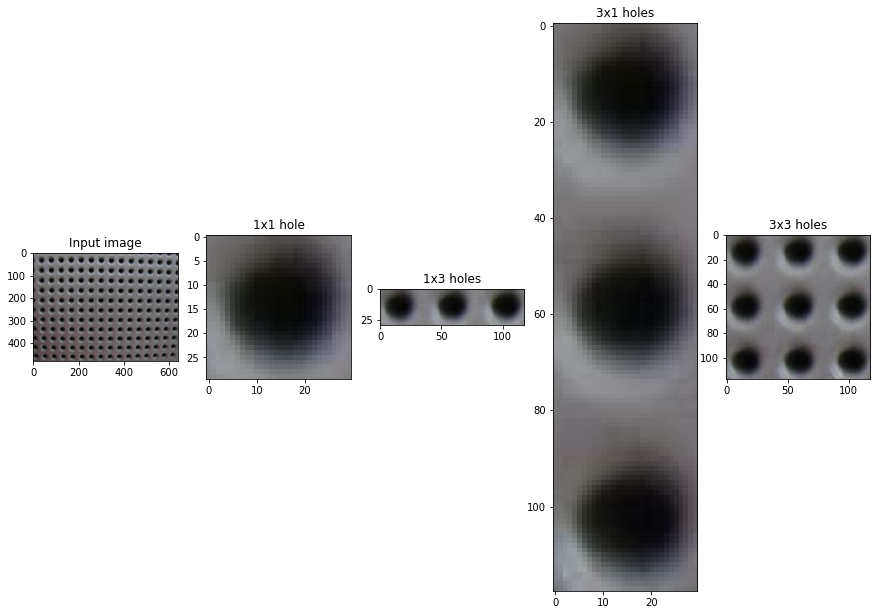

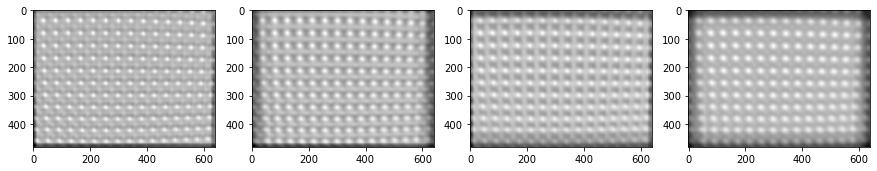

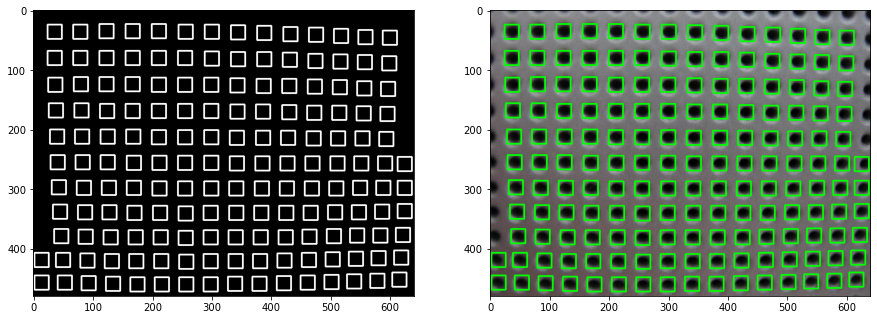

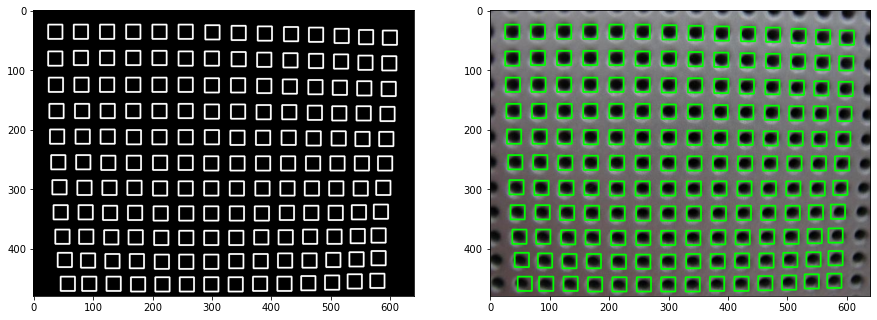

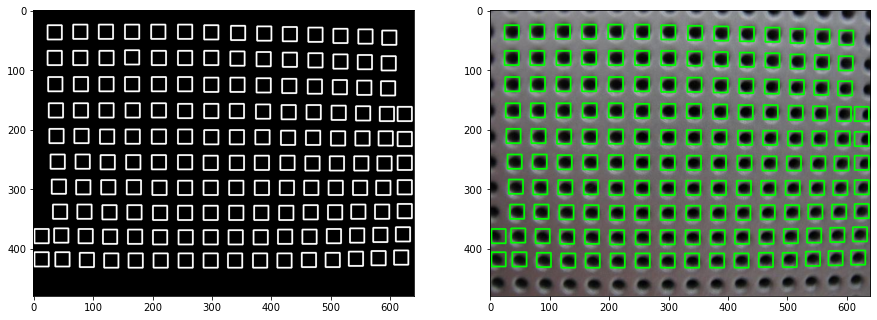

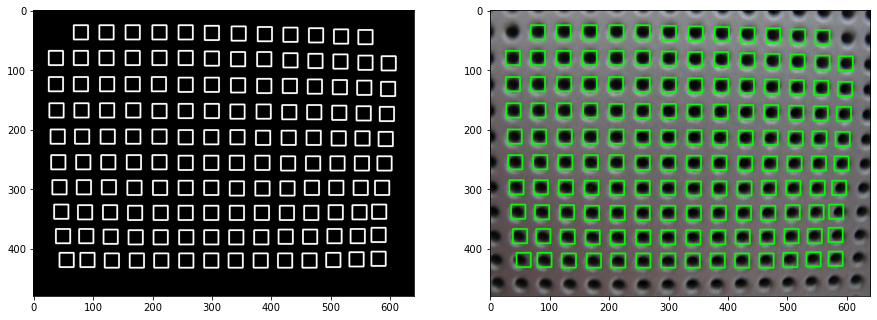

In [6]:
import os
import matplotlib.pyplot as plt
%matplotlib inline
import importlib
import random
import lab1
importlib.reload(lab1)
random.seed(0)


data_dir = 'inputs'
filename = 'holes.jpg'
img = lab1.read_img(os.path.join(data_dir, filename))
template = img[22:52, 22:52]
template2 = img[22:52, 22:140]
template3 = img[22:140, 22:52]
template4 = img[22:140, 22:140]


# Template 1x1
pad_height_bef, pad_height_aft = template.shape[0] // 2 - (1 if template.shape[0] % 2 == 0 else 0), template.shape[0] // 2
pad_width_bef, pad_width_aft = template.shape[1] // 2 - (1 if template.shape[1] % 2 == 0 else 0), template.shape[1] // 2
img_pad = lab1.pad_zeros(img, pad_height_bef, pad_height_aft, pad_width_bef, pad_width_aft)
response = lab1.normalized_cross_correlation_fast(img_pad, template)

# Template 1x3
pad_height_bef, pad_height_aft = template2.shape[0] // 2 - (1 if template2.shape[0] % 2 == 0 else 0), template2.shape[0] // 2
pad_width_bef, pad_width_aft = template2.shape[1] // 2 - (1 if template2.shape[1] % 2 == 0 else 0), template2.shape[1] // 2
img_pad = lab1.pad_zeros(img, pad_height_bef, pad_height_aft, pad_width_bef, pad_width_aft)
response2 = lab1.normalized_cross_correlation_fast(img_pad, template2)

# Template 3x1
pad_height_bef, pad_height_aft = template3.shape[0] // 2 - (1 if template3.shape[0] % 2 == 0 else 0), template3.shape[0] // 2
pad_width_bef, pad_width_aft = template3.shape[1] // 2 - (1 if template3.shape[1] % 2 == 0 else 0), template3.shape[1] // 2
img_pad = lab1.pad_zeros(img, pad_height_bef, pad_height_aft, pad_width_bef, pad_width_aft)
response3 = lab1.normalized_cross_correlation_fast(img_pad, template3)

# Template 3x3
pad_height_bef, pad_height_aft = template4.shape[0] // 2 - (1 if template4.shape[0] % 2 == 0 else 0), template4.shape[0] // 2
pad_width_bef, pad_width_aft = template4.shape[1] // 2 - (1 if template4.shape[1] % 2 == 0 else 0), template4.shape[1] // 2
img_pad = lab1.pad_zeros(img, pad_height_bef, pad_height_aft, pad_width_bef, pad_width_aft)
response4 = lab1.normalized_cross_correlation_fast(img_pad, template4)

lab1.show_imgs([img, template, template2, template3, template4], titles=['Input image', '1x1 hole', '1x3 holes', '3x1 holes', '3x3 holes'])
lab1.show_imgs([response, response2, response3, response4])

res = lab1.non_max_suppression(response, (int(template.shape[0] * 0.8), int(template.shape[1] * 0.8)), threshold=0.9)
lab1.show_img_with_squares(res, img_ori=img)

res2 = lab1.non_max_suppression(response2, (int(template.shape[0] * 0.8), int(template.shape[1] * 0.8)), threshold=0.9)
lab1.show_img_with_squares(res2, img_ori=img)

res3 = lab1.non_max_suppression(response3, (int(template.shape[0] * 0.8), int(template.shape[1] * 0.8)), threshold=0.9)
lab1.show_img_with_squares(res3, img_ori=img)

res4 = lab1.non_max_suppression(response4, (int(template.shape[0] * 0.8), int(template.shape[1] * 0.8)), threshold=0.9)
lab1.show_img_with_squares(res4, img_ori=img)

### 4.4 Mean-subtracted cross correlation (16%)

+ normalized_cross_correlation_ms: 10 points
+ Q&A: 6 points

Q: What are the benefits of subtracting the mean?

A: Bright pixels within the image will output a large correlation value when correlated with the template, regardless of if the pixels match or not, due to the element wise multiplication of pixel values. This means that bright regions of the image can be incorrectly intepreted as a high response, which may exceed the threshold and be counted as a local maximum after suppression, and thus be recognized as a template match. 
By subtracting the mean, we prevent these brighter regions from having incorrectly high responses by shifting the values by the mean across the image region. This will reduce the correlation output of the image region and template.

Relative error of normalized_cross_correlation() (<1e-4 will be fine): 3.366314040482247e-05
Relative error of normalized_cross_correlation_ms() (<1e-3 will be fine): 0.00020202815691295747


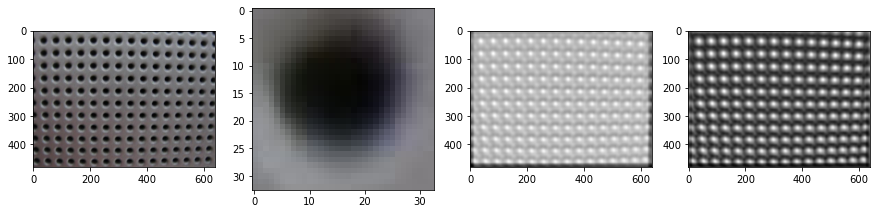

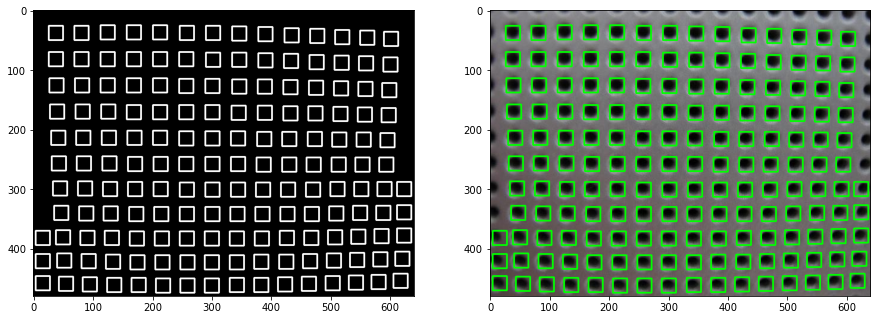

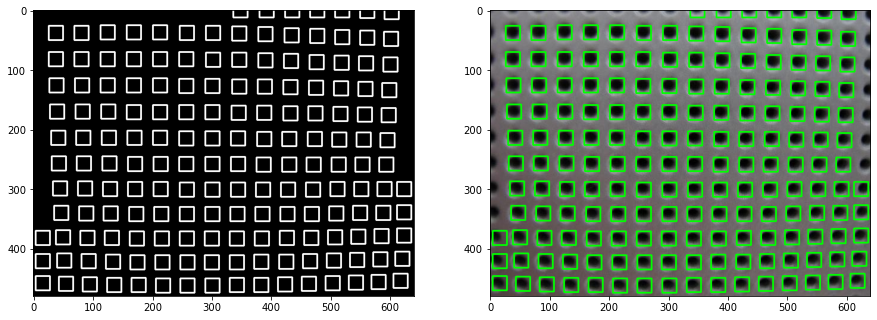

In [7]:
import os
import matplotlib.pyplot as plt
%matplotlib inline
import importlib
import numpy as np
import time
import cv2
import lab1
importlib.reload(lab1)

data_dir = 'inputs'
filename = 'holes.jpg'
img = lab1.read_img(os.path.join(data_dir, filename))
template = img[22:55, 22:55]


# pad zeros to the image
pad_height_bef, pad_height_aft = template.shape[0] // 2 - (1 if template.shape[0] % 2 == 0 else 0), template.shape[0] // 2
pad_width_bef, pad_width_aft = template.shape[1] // 2 - (1 if template.shape[1] % 2 == 0 else 0), template.shape[1] // 2
img_pad = lab1.pad_zeros(img, pad_height_bef, pad_height_aft, pad_width_bef, pad_width_aft)

response = lab1.normalized_cross_correlation_fast(img_pad, template)
response_ms = lab1.normalized_cross_correlation_ms(img_pad, template)

lab1.show_imgs([img, template, response, response_ms])

response_cv2 = cv2.matchTemplate(img_pad, template, cv2.TM_CCORR_NORMED)
response_cv2_ms = cv2.matchTemplate(img_pad, template, cv2.TM_CCOEFF_NORMED)
print('Relative error of normalized_cross_correlation() (<1e-4 will be fine):', np.linalg.norm(response - response_cv2))
print('Relative error of normalized_cross_correlation_ms() (<1e-3 will be fine):', np.linalg.norm(response_ms - response_cv2_ms))

res = lab1.non_max_suppression(response, (int(template.shape[0] * 0.8), int(template.shape[1] * 0.8)), threshold=0.9)
lab1.show_img_with_squares(res, img_ori=img)
res_ms = lab1.non_max_suppression(response_ms, (int(template.shape[0] * 0.8), int(template.shape[1] * 0.8)), threshold=0.5)
lab1.show_img_with_squares(res_ms, img_ori=img)

### 4.5 Auto-Correlation (6%)

+ Q&A: 6 points

Q: Explain why the correlation output responses decrease as one gets further away from the center of the output.

A: When the template used is the image itself, we can observe that the maximum correlation value would be in the centre of the image, since the image convoluted with itself would produce a value of 1. \
As we move further away from the centre of the output, more and more of the image to be convoluted is replaced with padded zeroes, which would reduce the magnitude of the correlation output, since the convoluting with zero produces a zero. 
Additionally, less of the image is overlapping with itself, and although the pattern of holes is fairly consistent in the image, there are differences between separate parts of the image, which will also reduce the magnitude of the correlation output.
Thus, we observe that the output response decreases further away from the centre, and start to fall below the threshold values where they are excluded in non-maximum suppression, leading to lesser squares being drawn.

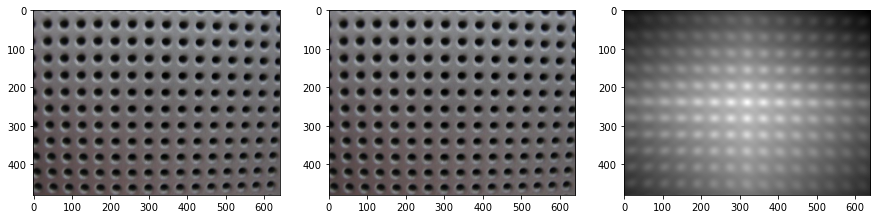

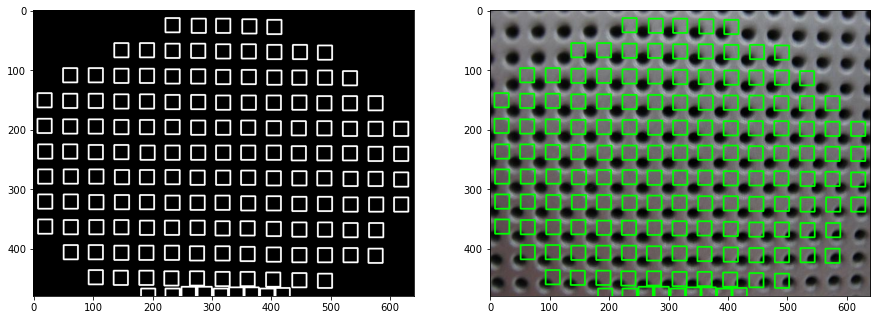

In [8]:
import os
import matplotlib.pyplot as plt
%matplotlib inline
import importlib
import numpy as np
import time
import cv2
import lab1
importlib.reload(lab1)

data_dir = 'inputs'
filename = 'holes.jpg'
img = lab1.read_img(os.path.join(data_dir, filename))
template = img.copy()

# pad zeros to the image
pad_height_bef, pad_height_aft = template.shape[0] // 2 - (1 if template.shape[0] % 2 == 0 else 0), template.shape[0] // 2
pad_width_bef, pad_width_aft = template.shape[1] // 2 - (1 if template.shape[1] % 2 == 0 else 0), template.shape[1] // 2
img_pad = lab1.pad_zeros(img, pad_height_bef, pad_height_aft, pad_width_bef, pad_width_aft)

response = cv2.matchTemplate(img_pad, template, cv2.TM_CCORR_NORMED)
lab1.show_imgs([img, template, response])

res = lab1.non_max_suppression(response, (26, 26), threshold=0.6)
lab1.show_img_with_squares(res, img_ori=img)

### 4.6 Limitations (6%)

+ Q&A: 6 points

Q: Observe the outputs and explain why template matching fails in certain regions of the image.

A: From the output, we observe a few false positives, especially towards the buildings in the lower half of the photo. This is due to the noisy nature of the background interfering with the cross correlation operation, which can lead to incorrectly high correlation responses, as can be seen in the response. This can also cause nearby patterns matching the template to flag as false negatives, which are then ignored by non-maximum suppression during the removal of points around the local maxima. 

We can also observe a few missing template matches near the top of the image, nearby to other matches. This could again also be due to removal of these points during the non-maximum suppression stage where points around the local maxima are removed. Alternatively, these can be flagged as a lower response during the cross correlation, as the perspective of the photo skews the image and the resulting matching pixels slightly, which could create a lower magnitude in the response as compared to the template image since it no longer matches exactly.

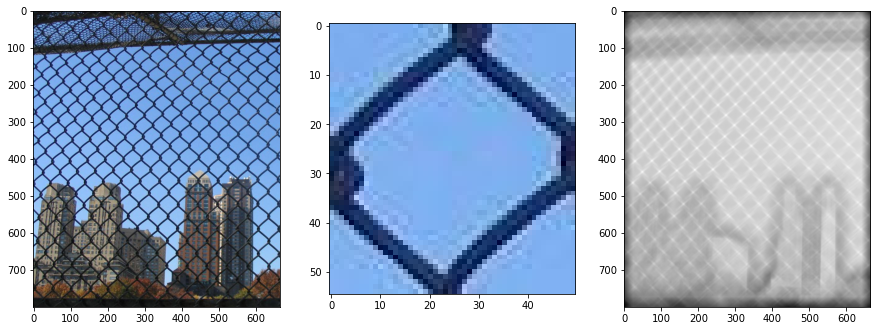

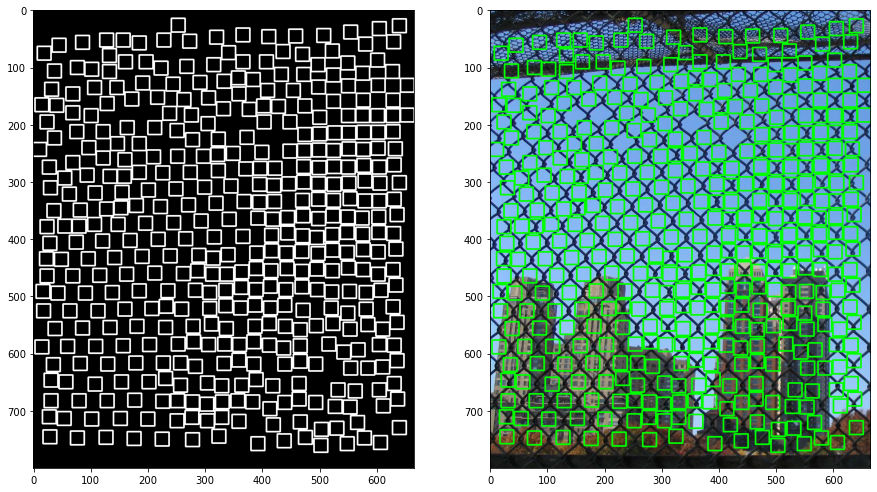

In [246]:
import os
import matplotlib.pyplot as plt
%matplotlib inline
import importlib
import numpy as np
import time
import cv2
import lab1
importlib.reload(lab1)

data_dir = 'inputs'
filename = 'fence.jpg'
img = lab1.read_img(os.path.join(data_dir, filename))
template = img[310:365, 295:345]
# pad zeros to the image
pad_height_bef, pad_height_aft = template.shape[0] // 2 - (1 if template.shape[0] % 2 == 0 else 0), template.shape[0] // 2
pad_width_bef, pad_width_aft = template.shape[1] // 2 - (1 if template.shape[1] % 2 == 0 else 0), template.shape[1] // 2
img_pad = lab1.pad_zeros(img, pad_height_bef, pad_height_aft, pad_width_bef, pad_width_aft)

response = lab1.normalized_cross_correlation_fast(img_pad, template)

lab1.show_imgs([img, template, response])


res = lab1.non_max_suppression(response, (int(template.shape[0] * 0.5), int(template.shape[1] * 0.5)), threshold=0.8)
lab1.show_img_with_squares(res, img_ori=img)


**Congrats! You have completed all tasks for lab 1.**